# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Andrew Jonatan Damanik
- Email: andrewdamanik23@gmail.com
- Id Dicoding: drewjd27

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline


from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, fbeta_score, make_scorer
from skopt import BayesSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

import joblib

import warnings
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan diguankan

In [2]:
ds = pd.read_csv('employee_data.csv')
ds.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

Dataset ini berisi rincian demografi, metrik terkait pekerjaan, dan tanda-tanda pergantian karyawan.

* **EmployeeId** - Identifikasi karyawan
* **Attrition** - Apakah karyawan keluar dari perusahaan? (0=no, 1=yes)
* **Age** - Usia karyawan
* **BusinessTravel** - Komitmen perjalanan dinas untuk pekerjaan
* **DailyRate** - Gaji harian
* **Department** - Departemen tempat karyawan bekerja
* **DistanceFromHome** - Jarak dari rumah ke tempat kerja (dalam km)
* **Education** - Tingkat pendidikan (1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor)
* **EducationField** - Bidang pendidikan
* **EnvironmentSatisfaction** - Kepuasan terhadap lingkungan kerja (- 1-Low, 2-Medium, 3-High, 4-Very High)
* **Gender** - Jenis kelamin karyawan
* **HourlyRate** - Gaji per jam
* **JobInvolvement** - Tingkat keterlibatan dalam pekerjaan (1-Low, 2-Medium, 3-High, 4-Very High)
* **JobLevel** - Tingkatan pekerjaan (1 hingga 5)
* **JobRole** - Peran atau posisi pekerjaan
* **JobSatisfaction** - Kepuasan terhadap pekerjaan (1-Low, 2-Medium, 3-High, 4-Very High)
* **MaritalStatus** - Status pernikahan
* **MonthlyIncome** - Gaji bulanan
* **MonthlyRate** - Tarif bulanan
* **NumCompaniesWorked** - Jumlah perusahaan yang pernah menjadi tempat kerja
* **Over18** - Apakah usia di atas 18 tahun?
* **OverTime** - Apakah bekerja lembur?
* **PercentSalaryHike** - Persentase kenaikan gaji tahun lalu
* **PerformanceRating** - Penilaian kinerja (1-Low, 2-Good, 3-Excellent, 4-Outstanding)
* **RelationshipSatisfaction** - Kepuasan terhadap hubungan antar rekan kerja (1-Low, 2-Medium, 3-High, 4-Very High)
* **StandardHours** - Jam kerja standar
* **StockOptionLevel** - Tingkatan opsi saham
* **TotalWorkingYears** - Total tahun pengalaman kerja
* **TrainingTimesLastYear** - Jumlah pelatihan yang diikuti tahun lalu
* **WorkLifeBalance** - Keseimbangan kehidupan dan pekerjaan (1-Low, 2-Good, 3-Excellent, 4-Outstanding)
* **YearsAtCompany** - Lama bekerja di perusahaan saat ini (dalam tahun)
* **YearsInCurrentRole** - Lama menjabat pada peran saat ini (dalam tahun)
* **YearsSinceLastPromotion** - Lama waktu sejak promosi terakhir (dalam tahun)
* **YearsWithCurrManager** - Lama bekerja dengan manajer saat ini (dalam tahun)


In [3]:
#cek variabel data dan tipe datanya
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [4]:
# cek deskripsi statistik dataset
ds.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Cek Missing Values

In [5]:
ds_cleaned = ds.copy()

In [6]:
empty_data = ds_cleaned.columns[ds_cleaned.isnull().any()].tolist()

# Buat dataframe untuk menampilkan variabel yang memiliki nilai kosong beserta tipe datanya
nan_info = pd.DataFrame({
    'Tipe Data': ds_cleaned[empty_data].dtypes,
    'Jumlah Data Kosong': ds_cleaned[empty_data].isnull().sum()
})

print("Variabel yang memiliki nilai NaN beserta tipe datanya:")
nan_info

Variabel yang memiliki nilai NaN beserta tipe datanya:


,Tipe Data,Jumlah Data Kosong
Attrition,float64,412


Karena jumlah data kosong hanya 412 dari 1470, saya akan melakukan metode menghapus baris yang memiliki nilai kosong.

In [7]:
# hapus data yang memiliki nilai kosong
ds_cleaned = ds_cleaned.dropna()
# cek jumlah data setelah dihapus
print("Jumlah data setelah dihapus:", ds_cleaned.shape[0])

Jumlah data setelah dihapus: 1058


### Cek Data Duplikat

In [8]:
# cek jumlah data yang duplikat
duplicate_data = ds_cleaned.duplicated().sum()
print(f"Jumlah data yang duplikat: {duplicate_data}")

Jumlah data yang duplikat: 0


Dapat dilihat bahwa tidak ada data duplikat pada dataset ini. Dengan begini, data sudah bersih dari missing values dan duplicated data.

In [9]:
# simpan dataset yang bersih ke file CSV
ds_cleaned.to_csv('employee_data_cleaned.csv', index=False)

### Univariate Analysis

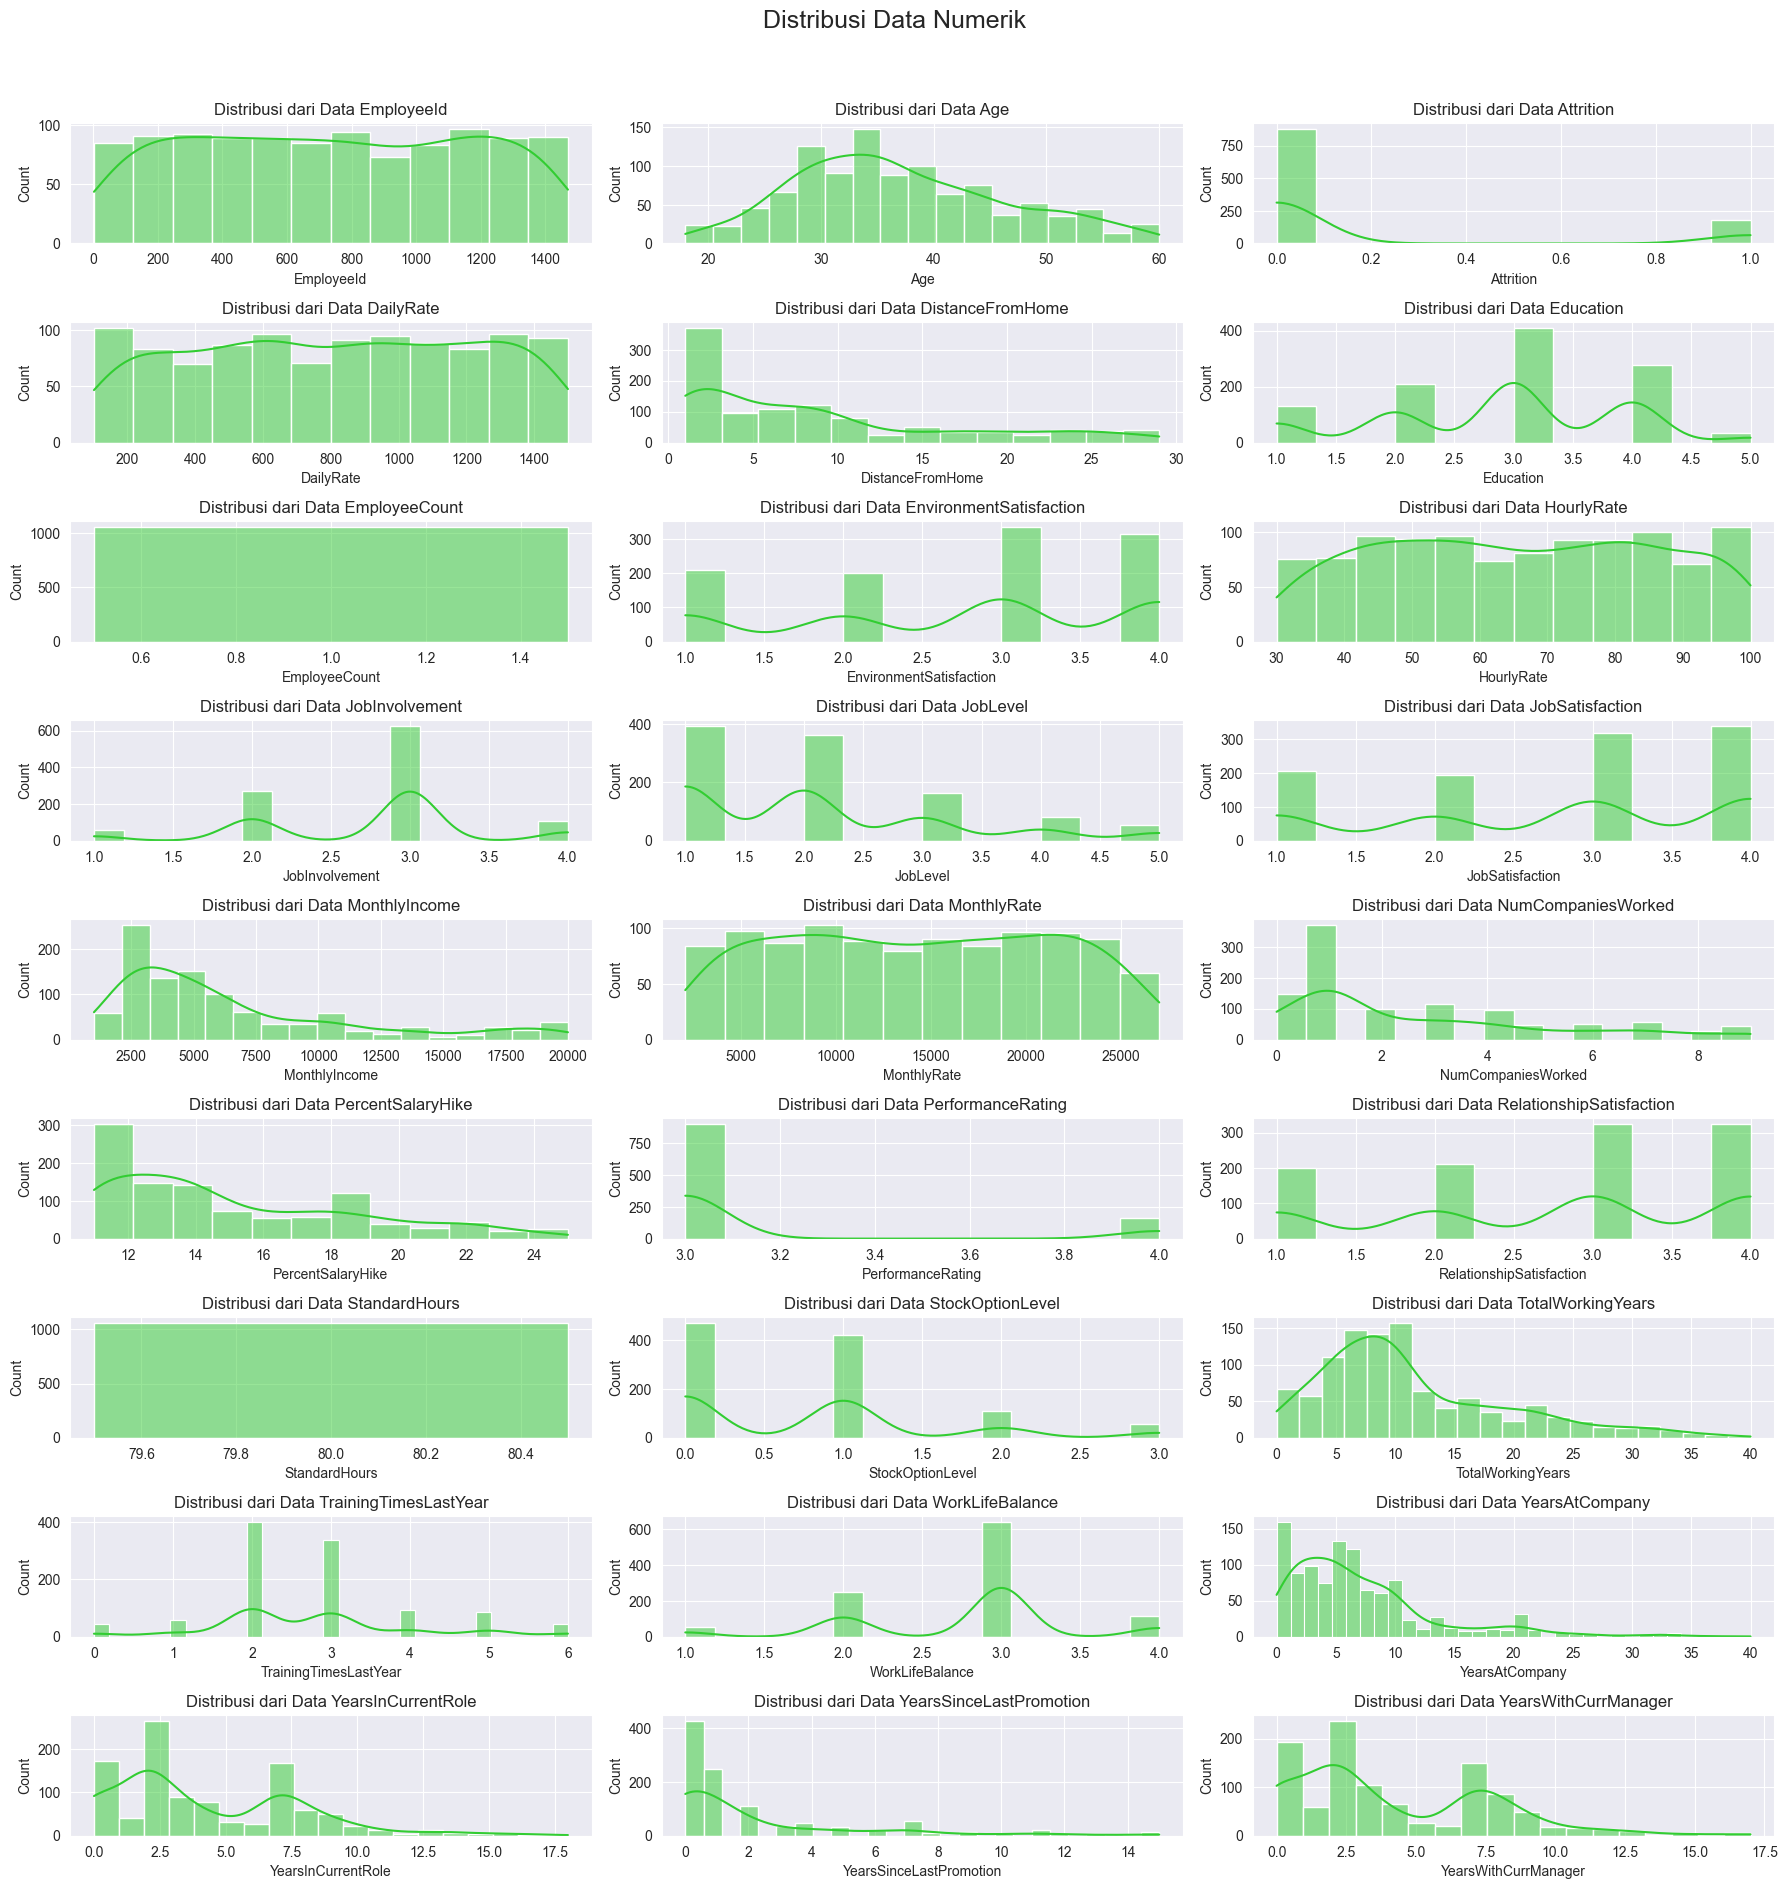

In [10]:
# Identifikasi variabel numerik
numerical_variables = ds_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Univariate analysis untuk variabel numerik
plt.figure(figsize=(18, 20))
for i, col in enumerate(numerical_variables, 1):
    plt.subplot(len(numerical_variables) // 3 + 1, 3, i)
    sns.histplot(ds_cleaned[col], kde=True, color='limegreen')
    plt.title(f'Distribusi dari Data {col}')
plt.suptitle("Distribusi Data Numerik", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

In [11]:
# Identifikasi variabel kategorikal
categorical_variables = ds_cleaned.select_dtypes(include=['object']).columns.tolist()

# Mengecek jumlah kategori dalam variabel bertipe object
for col in categorical_variables:
    print(f"Variabel '{col}' memiliki {ds_cleaned[col].nunique()} kategori.")

Variabel 'BusinessTravel' memiliki 3 kategori.
Variabel 'Department' memiliki 3 kategori.
Variabel 'EducationField' memiliki 6 kategori.
Variabel 'Gender' memiliki 2 kategori.
Variabel 'JobRole' memiliki 9 kategori.
Variabel 'MaritalStatus' memiliki 3 kategori.
Variabel 'Over18' memiliki 1 kategori.
Variabel 'OverTime' memiliki 2 kategori.


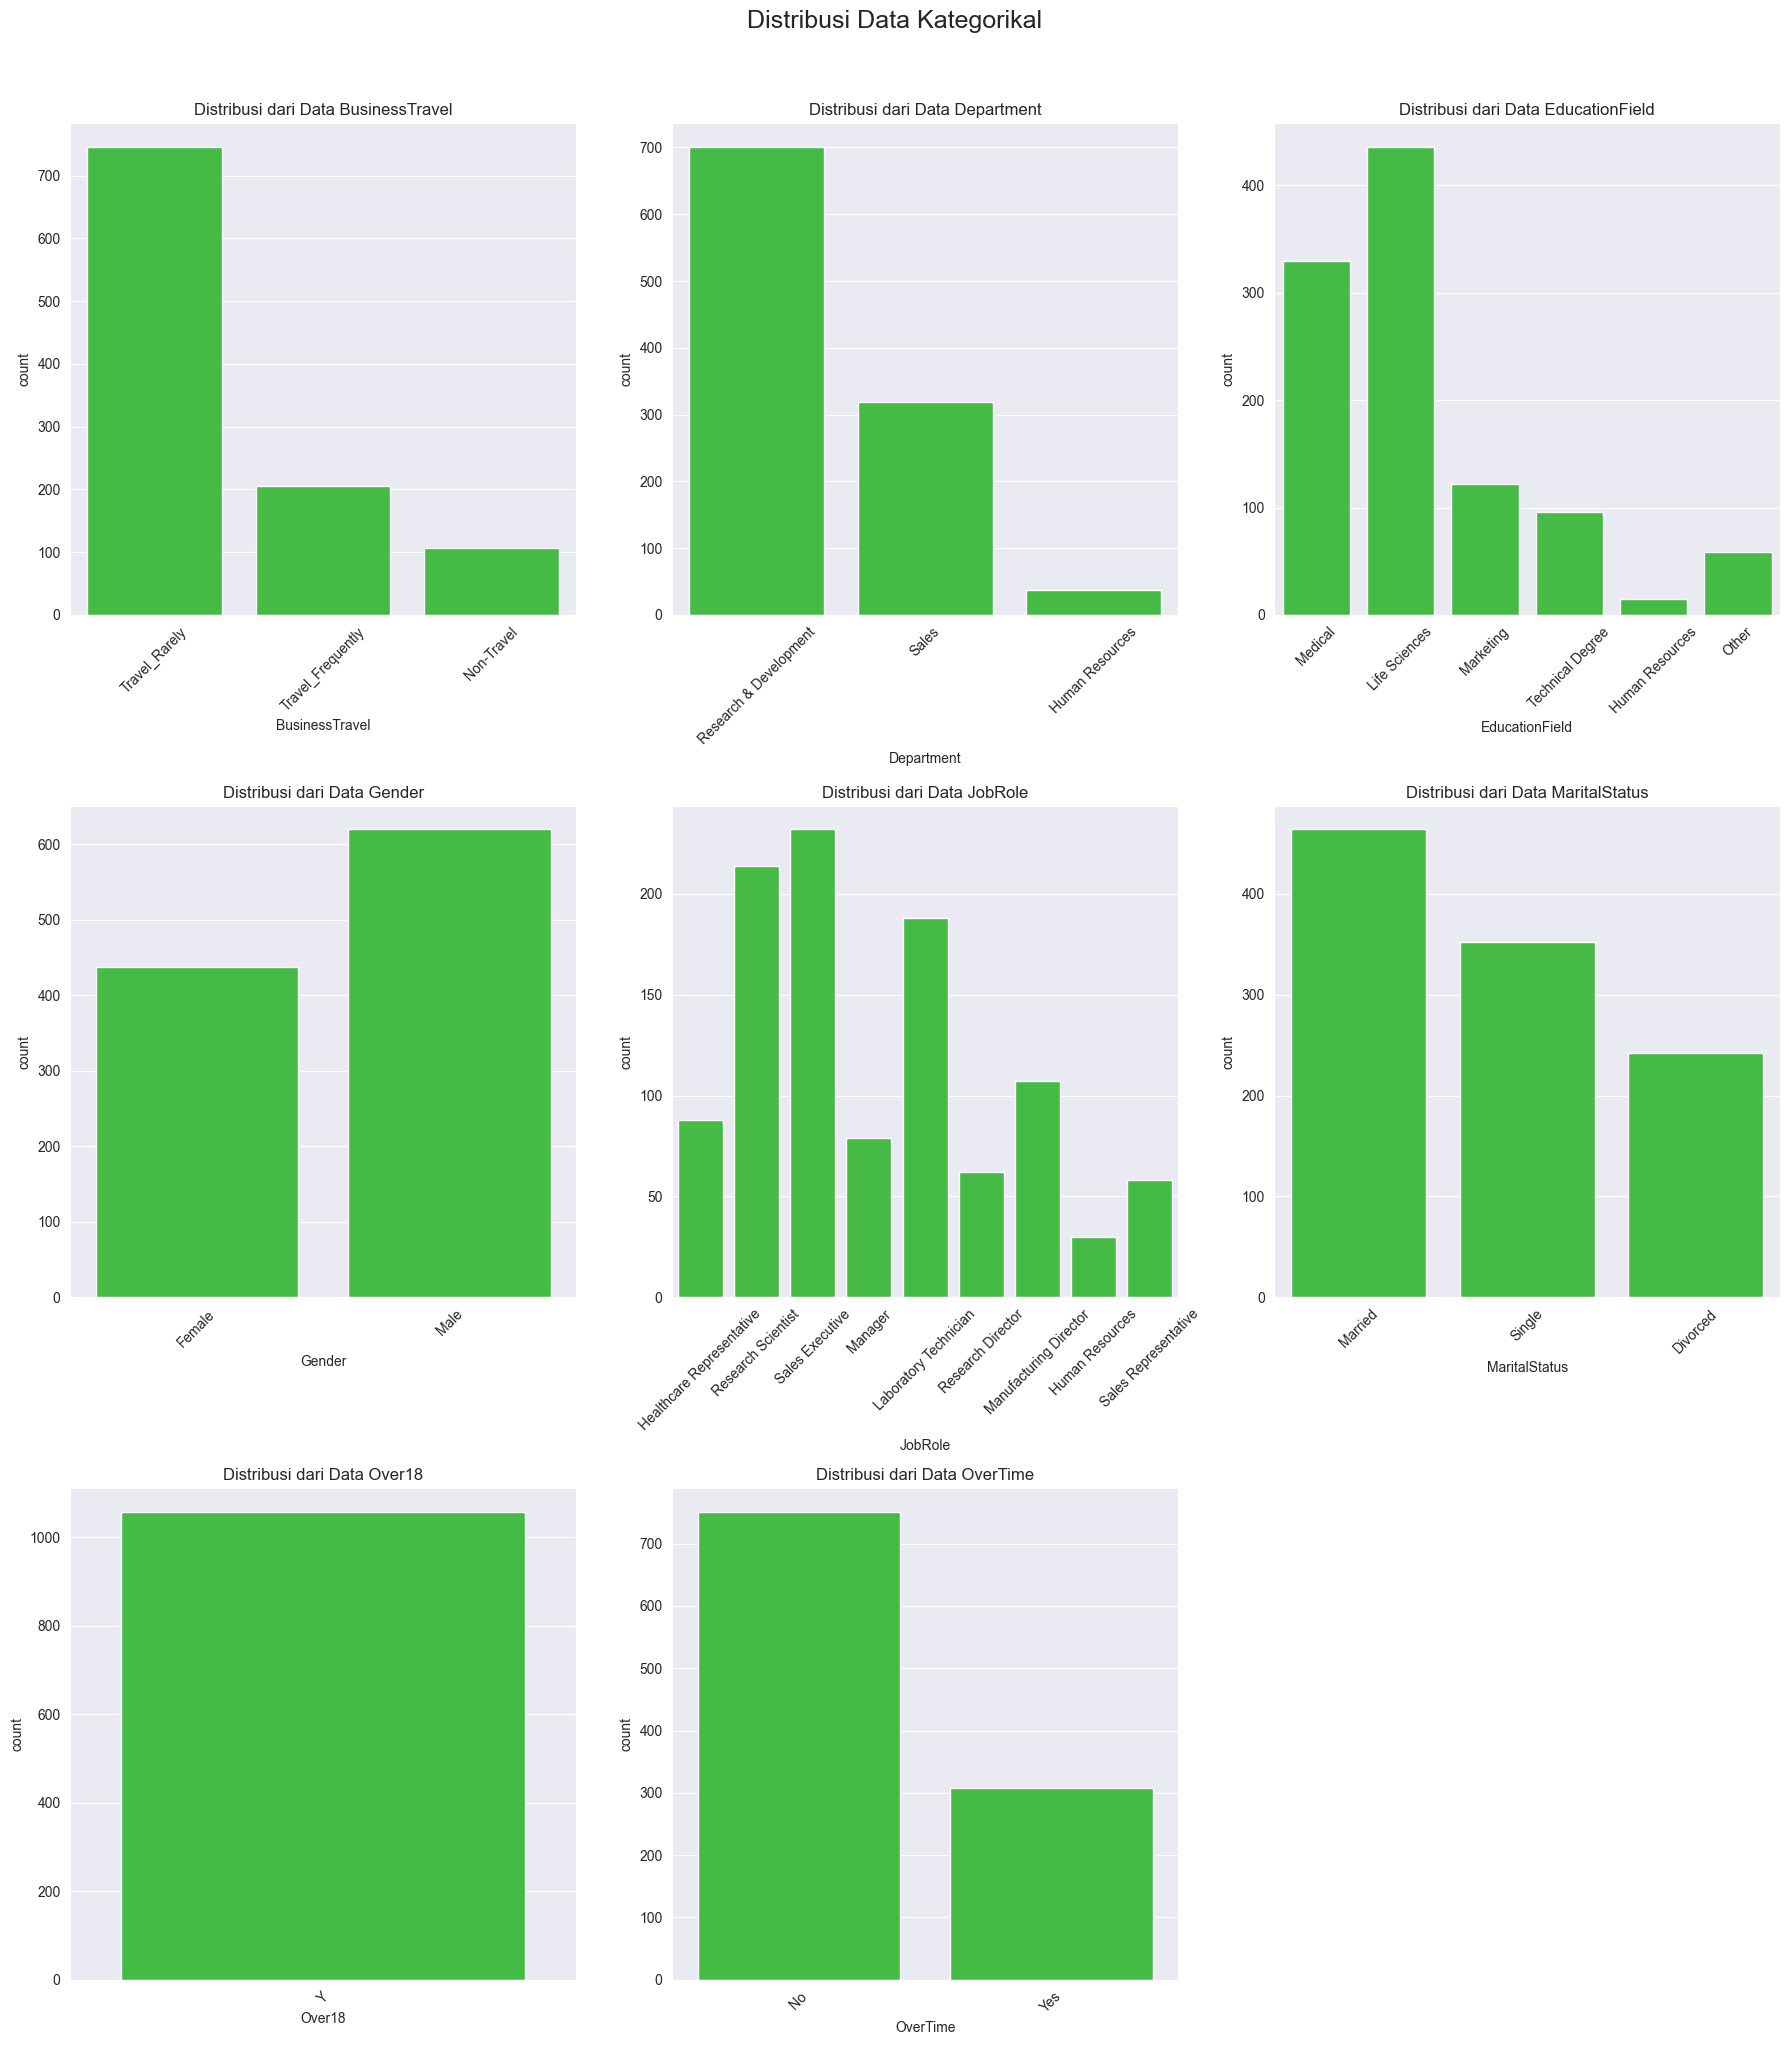

In [12]:
# Identifikasi variabel kategorikal
categorical_variables = ds_cleaned.select_dtypes(include=['object']).columns.tolist()

# Univariate analysis untuk variabel kategorikal
plt.figure(figsize=(18, 20))
for i, col in enumerate(categorical_variables, 1):
    plt.subplot(len(categorical_variables) // 3 + 1, 3, i)
    sns.countplot(data=ds_cleaned, x=col, color='limegreen')
    plt.title(f'Distribusi dari Data {col}')
    plt.xticks(rotation=45)
plt.suptitle("Distribusi Data Kategorikal", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

In [13]:
# hapus kolom `EmployeeCount`, `StandardHours`, dan `Over18` karena hanya memiliki satu nilai
ds_cleaned = ds_cleaned.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1)

### Multivariate Data Analysis

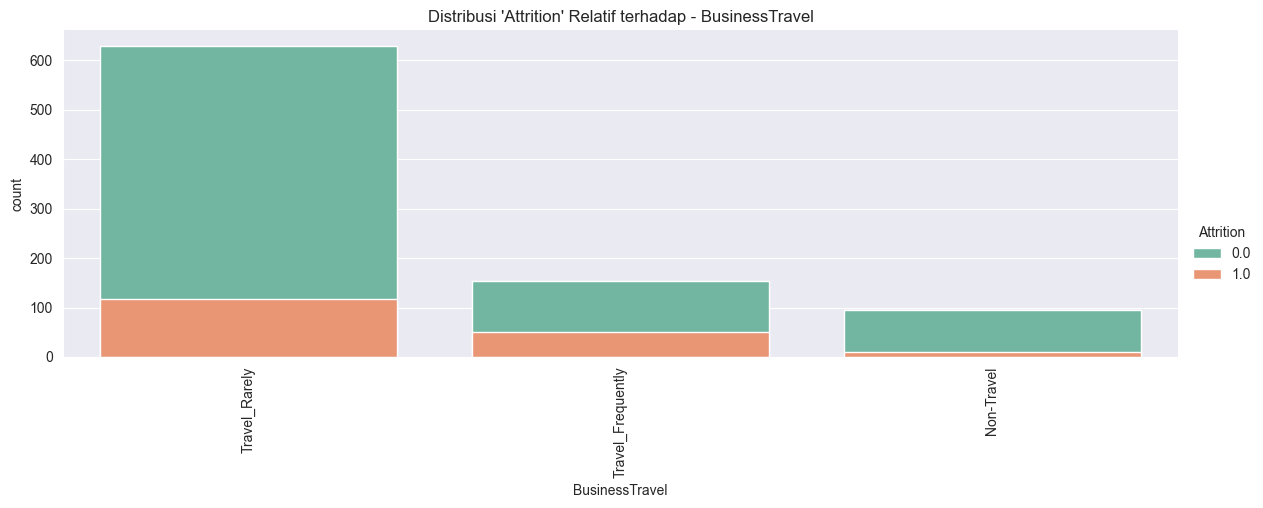

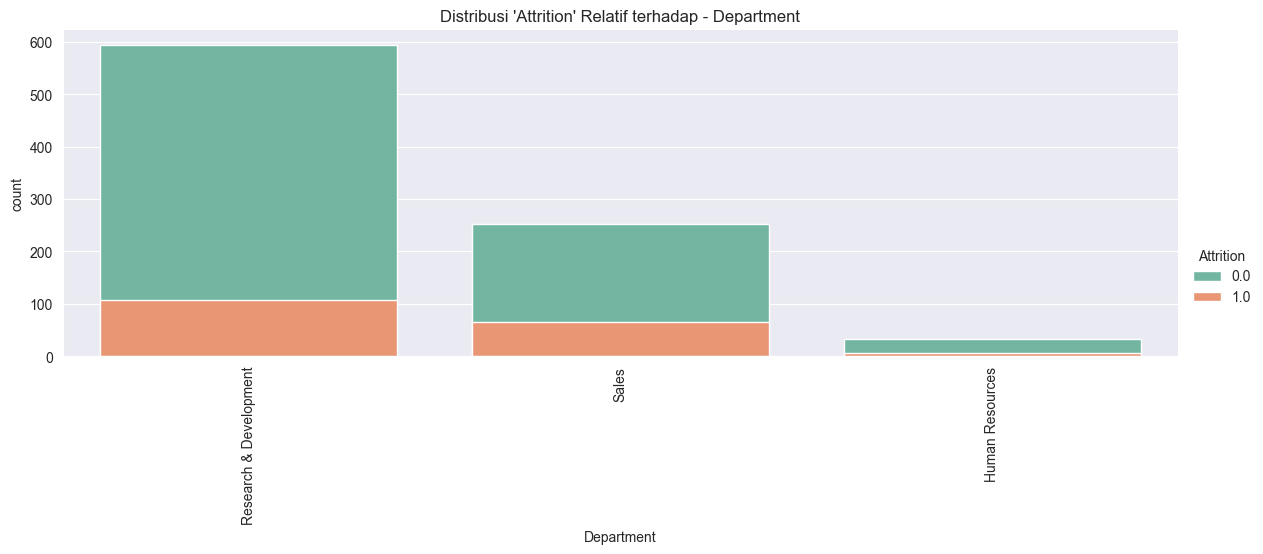

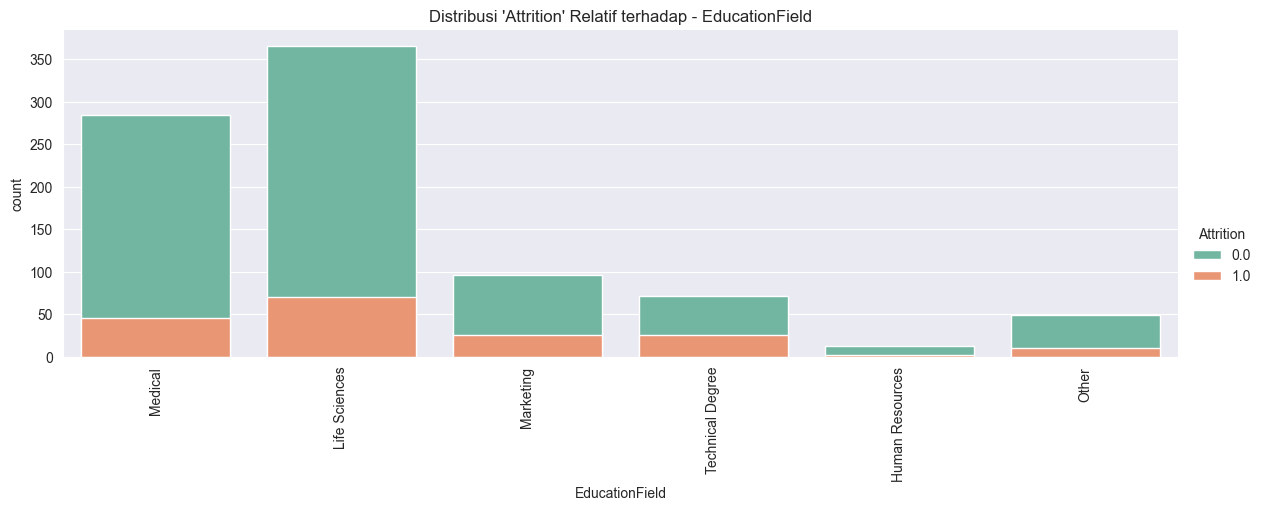

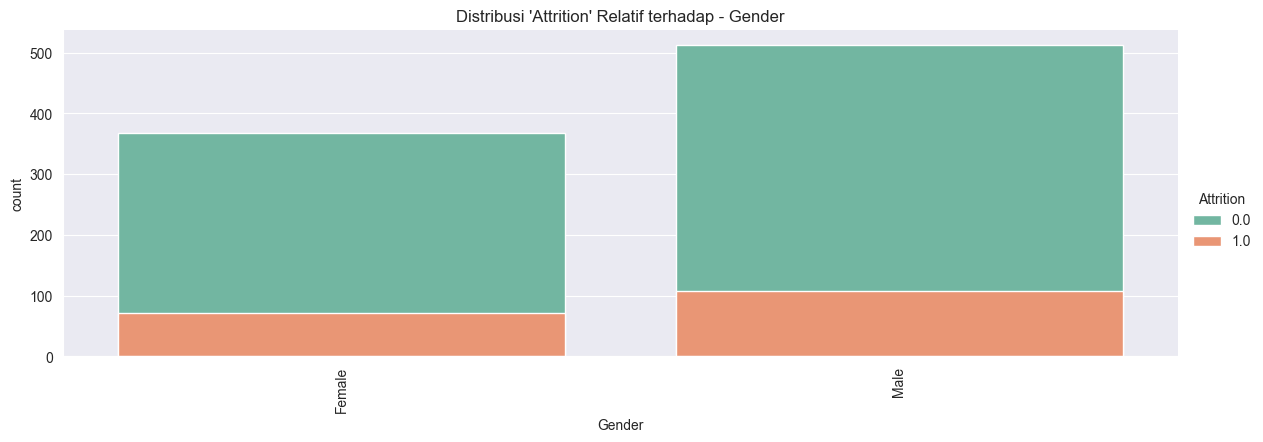

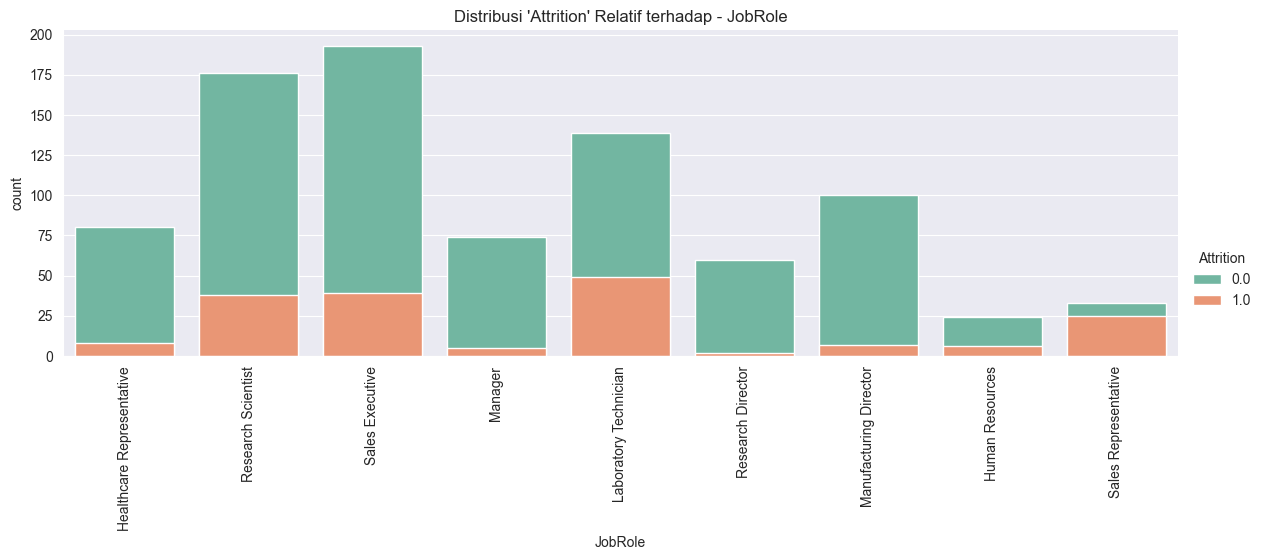

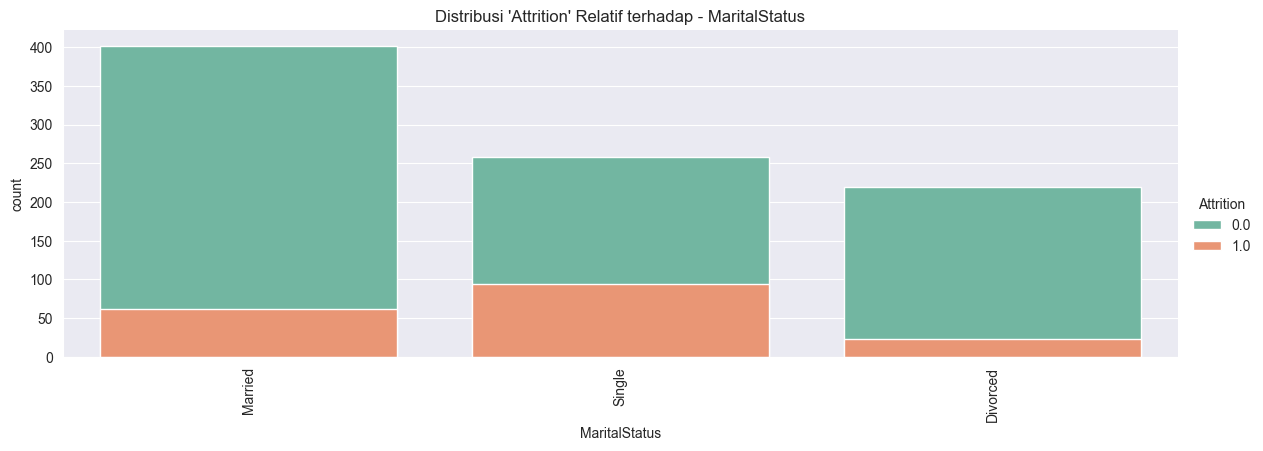

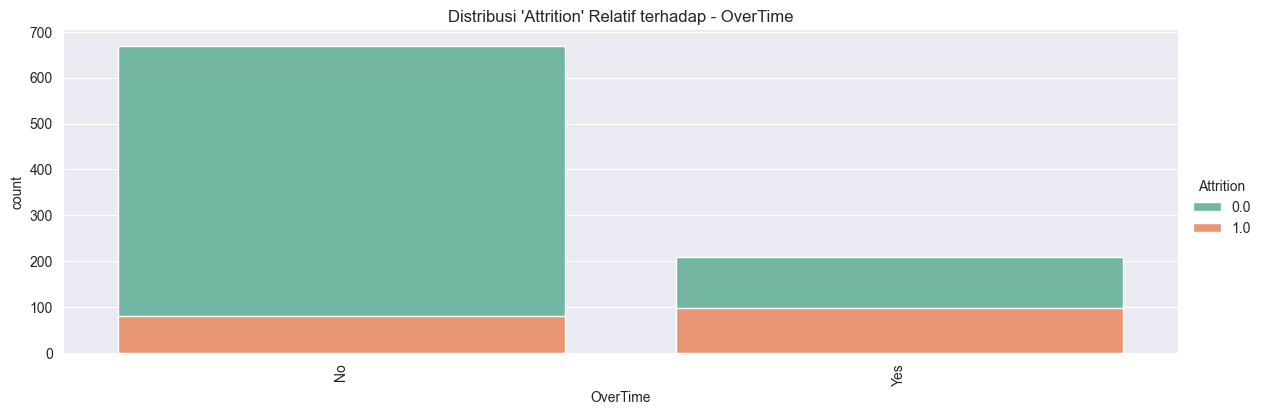

In [14]:
# Identifikasi semua variabel kategorikal dalam dataset
categorical_variables = ds_cleaned.select_dtypes(include=['object']).columns.tolist()

# Membuat plot untuk setiap fitur kategorikal relatif terhadap 'Attrition'
for col in categorical_variables:
    sns.catplot(x=col, hue="Attrition", kind="count", dodge=False, height=4, aspect=3, data=ds_cleaned, palette="Set2")
    plt.title("Distribusi 'Attrition' Relatif terhadap - {}".format(col))
    plt.xticks(rotation=90)
    plt.show()


### Correlation Matrix

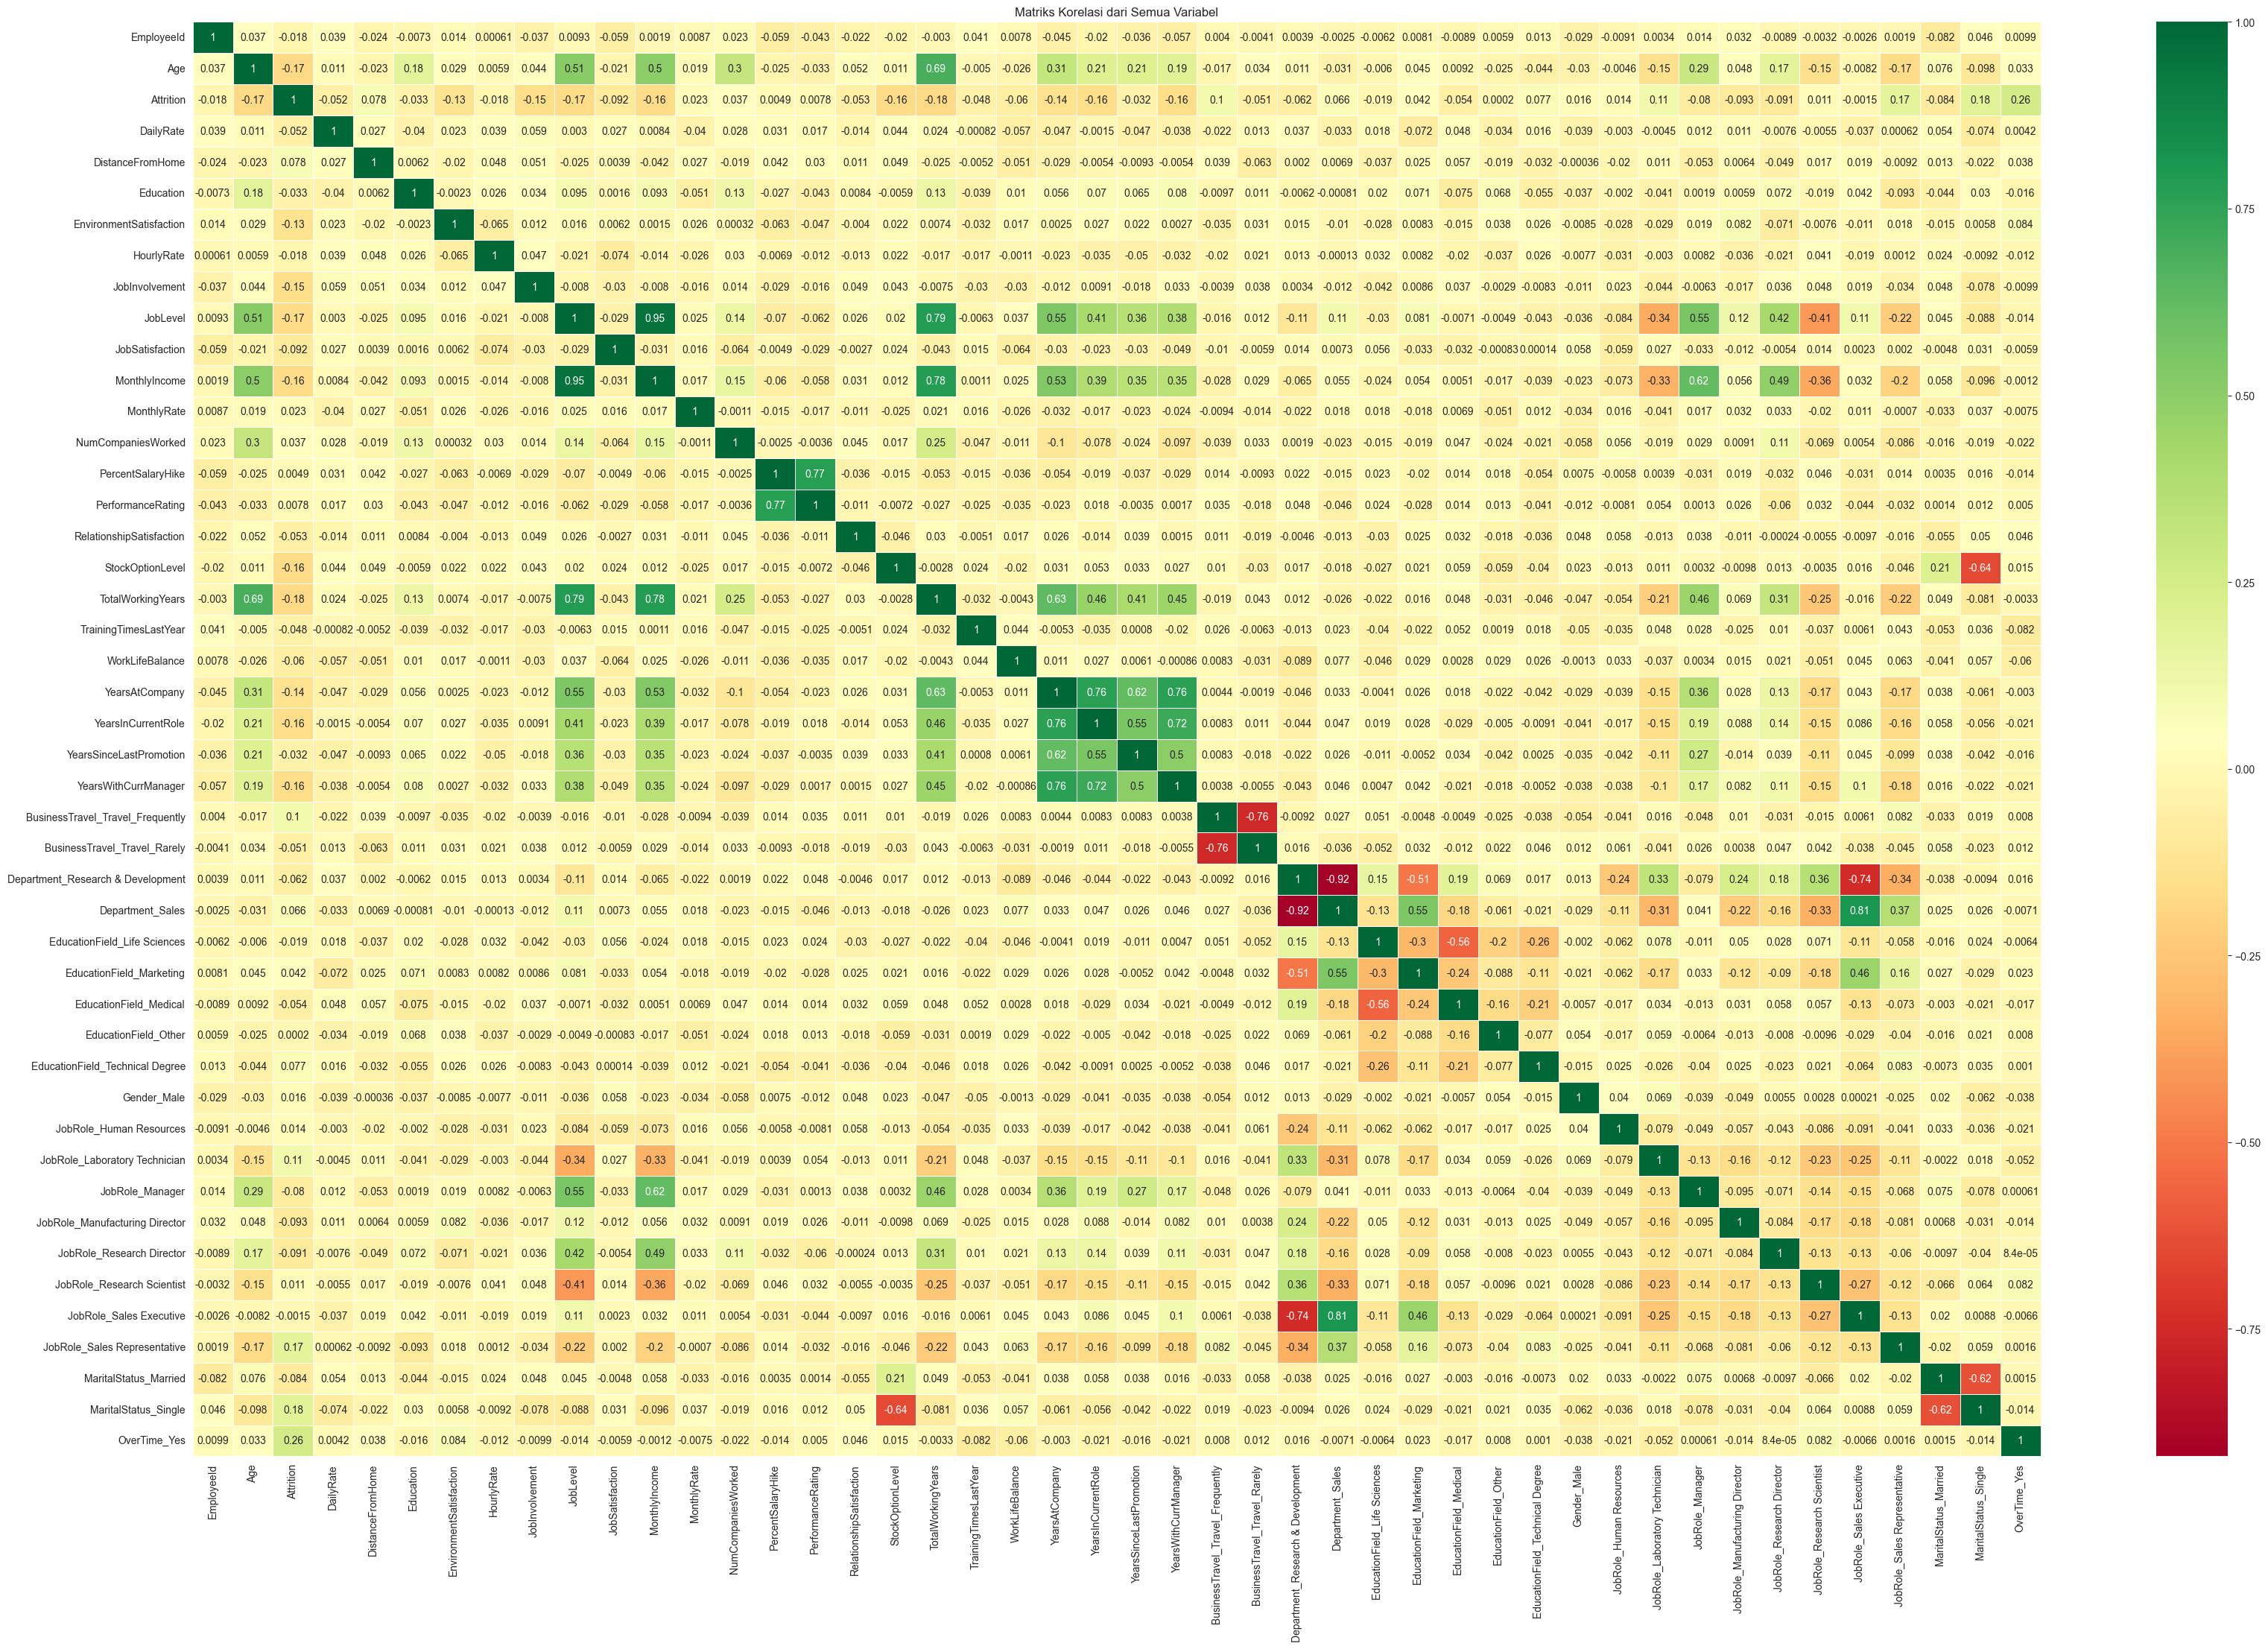

In [15]:
# Identifikasi fitur numerik dan kategorikal
categorical_columns = ds_cleaned.select_dtypes(include=['object']).columns.tolist()
numerical_columns = ds_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-hot encoding untuk fitur kategorikal
ds_encoded = pd.get_dummies(ds_cleaned, columns=categorical_columns, drop_first=True)

# Membuat matriks korelasi untuk seluruh fitur (numerik dan kategorikal yang telah dienkode)
correlation_matrix = ds_encoded.corr()

# Plot matriks korelasi
plt.figure(figsize=(40, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', linewidths=0.5)
plt.title('Matriks Korelasi dari Semua Variabel')
plt.show()

Nilai Korelasi Fitur dengan `Atrition`:
OverTime_Yes                         0.255856
MaritalStatus_Single                 0.184303
JobRole_Sales Representative         0.168200
JobRole_Laboratory Technician        0.113390
BusinessTravel_Travel_Frequently     0.104074
DistanceFromHome                     0.078074
EducationField_Technical Degree      0.076868
Department_Sales                     0.066083
EducationField_Marketing             0.042300
NumCompaniesWorked                   0.037429
MonthlyRate                          0.023299
Gender_Male                          0.015887
JobRole_Human Resources              0.014040
JobRole_Research Scientist           0.011259
PerformanceRating                    0.007755
PercentSalaryHike                    0.004907
EducationField_Other                 0.000197
JobRole_Sales Executive             -0.001532
HourlyRate                          -0.017524
EmployeeId                          -0.017912
EducationField_Life Sciences        -0.0

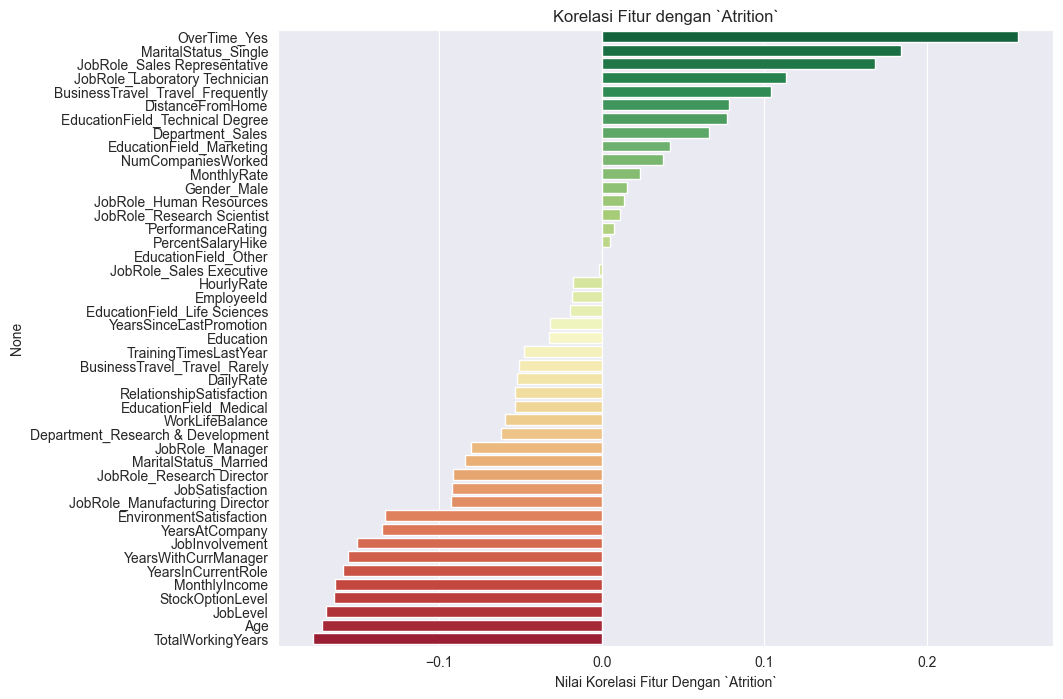

In [16]:
# masukkan fitur numerik dan kategorikal ke list yang terpisah
categorical_columns = ds_cleaned.select_dtypes(include=['object']).columns.tolist()
numerical_columns = ds_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One hot encoding untuk fitur kategorikal
ds_encoded = pd.get_dummies(ds_cleaned, columns=categorical_columns, drop_first=True)

correlation_matrix = ds_encoded.corr()

# Ambil korelasi dengan kolom 'Attrition'
attrition_correlation = correlation_matrix["Attrition"].sort_values(ascending=False)

correlation_value = attrition_correlation
correlation_value = correlation_value.drop('Attrition')

print("Nilai Korelasi Fitur dengan `Atrition`:")
print(correlation_value)

# Plot the top 10 correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_value.values, y=correlation_value.index, hue=correlation_value.index, dodge=False, palette="RdYlGn_r", legend=False)
plt.title("Korelasi Fitur dengan `Atrition`")
plt.xlabel("Nilai Korelasi Fitur Dengan `Atrition`")
plt.show()


10 Fitur Dengan Korelasi Tertinggi dengan Atrition:
OverTime_Yes                        0.255856
MaritalStatus_Single                0.184303
JobRole_Sales Representative        0.168200
JobRole_Laboratory Technician       0.113390
BusinessTravel_Travel_Frequently    0.104074
DistanceFromHome                    0.078074
EducationField_Technical Degree     0.076868
Department_Sales                    0.066083
EducationField_Marketing            0.042300
NumCompaniesWorked                  0.037429
Name: Attrition, dtype: float64


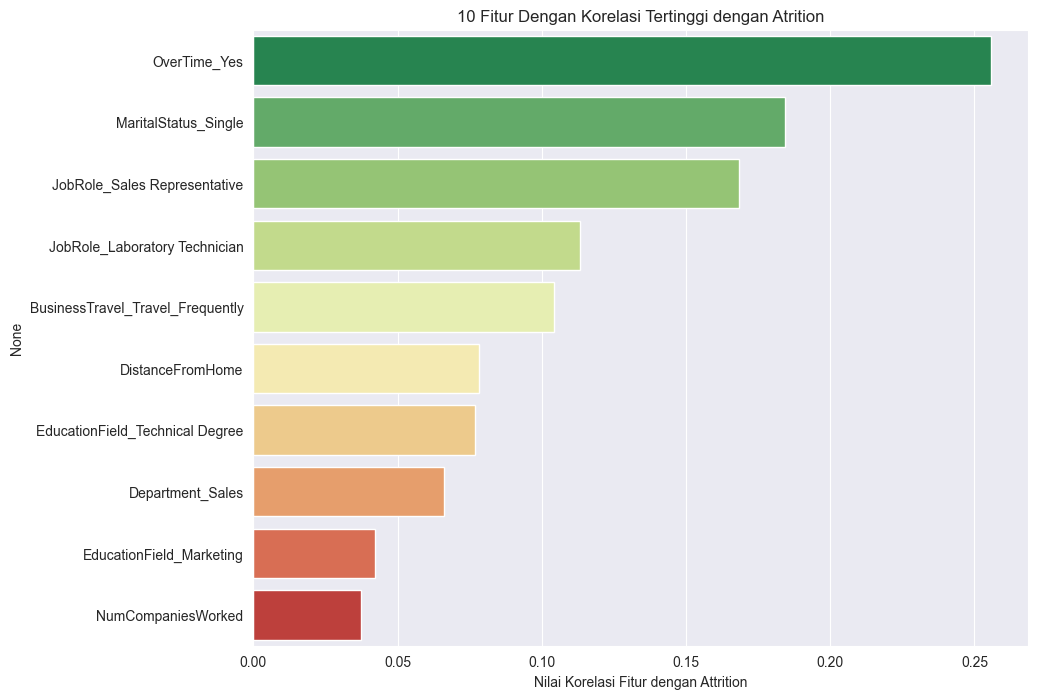

In [17]:
# Ambil 10 fitur dengan korelasi tertinggi terhadap 'Attrition'
top_10_factors = attrition_correlation.head(11) 
top_10_factors = top_10_factors.drop('Attrition')  

print("10 Fitur Dengan Korelasi Tertinggi dengan Atrition:")
print(top_10_factors)

# Plot the top 10 correlations
plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_factors.values, y=top_10_factors.index, hue=top_10_factors.index, dodge=False, palette="RdYlGn_r", legend=False)
plt.title("10 Fitur Dengan Korelasi Tertinggi dengan Atrition")
plt.xlabel("Nilai Korelasi Fitur dengan Attrition")
plt.show()

## Data Preparation / Preprocessing

In [18]:
# Salin dataset dan drop kolom ID unik
ds_preparation = ds_cleaned.copy()
ds_preparation = ds_preparation.drop(['EmployeeId'], axis=1)

# Pisahkan fitur kategorikal dan numerikal
categorical_columns = ds_preparation.select_dtypes(include=['object']).columns.tolist()
numerical_columns = ds_preparation.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Pastikan kolom target 'Attrition' tidak termasuk sebagai fitur numerik
if 'Attrition' in numerical_columns:
    numerical_columns.remove('Attrition')

# One-hot encoding pada fitur kategorikal
ds_preparation = pd.get_dummies(ds_preparation, columns=categorical_columns, drop_first=True)

# Ubah nilai target 'Attrition' menjadi integer 0 dan 1 (jika belum)
ds_preparation = ds_preparation.astype(int)

In [19]:
# Pisahkan fitur dan target
X = ds_preparation.drop('Attrition', axis=1)
y = ds_preparation['Attrition']

# Split data dengan stratifikasi untuk mempertahankan proporsi kelas target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling hanya pada fitur numerik, dan hanya menggunakan data latih
scaler = RobustScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

## Modeling

In [20]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluation

In [21]:
# Prediksi pada data uji
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# Evaluasi hasil
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAUC-ROC Score:", roc_auc_score(y_test, y_proba))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[175   1]
 [ 31   5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       176
           1       0.83      0.14      0.24        36

    accuracy                           0.85       212
   macro avg       0.84      0.57      0.58       212
weighted avg       0.85      0.85      0.80       212


AUC-ROC Score: 0.7877209595959596

Accuracy Score: 0.8490566037735849


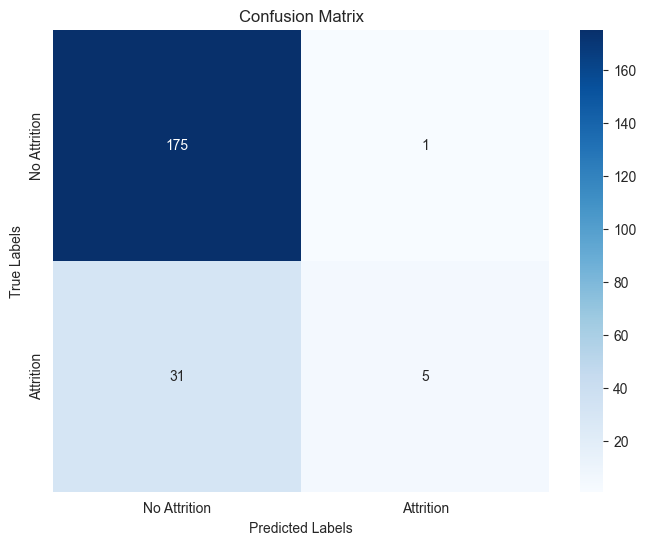

In [22]:
# Visualisasi confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Menyimpan model yang dilatih
joblib.dump(rf, 'model_predict_attrition.joblib')

['model_predict_attrition.joblib']